In [1]:
import matplotlib.pyplot as plt
import aperiodic_codes.cut_and_project as cnp
from aperiodic_codes.cut_and_project.code_param_utils import *

In [2]:
low = -3
high = 4
lat_pts = cnp.cnp_utils.gen_lat(low, high, dim=6)
voronoi = cnp.cnp_utils.gen_voronoi(dim=6)
proj_neg = cnp.cnp_utils.gen_proj_neg()
proj_pos = cnp.cnp_utils.gen_proj_pos()
cut_pts, _ = cnp.cnp_utils.cut(lat_pts, voronoi, proj_neg)
proj_pts = cnp.cnp_utils.project(cut_pts, proj_pos)
adjacency_matrix = cnp.three_dim_self_dual.gen_adj_mat(cut_pts)
n = len(cut_pts)

In [3]:
def pipeline_calc_code(project_pts, adjacency_matrix,h):
    # get the minimum distance of the code
    k, d = get_classical_code_distance_time_limit(h, time_limit=10)
    print(f'k={k}, d={d}')
    
    if d == np.inf:
        return None, None, None, None

    # get the logical operator
    _, logical_op = get_classical_code_distance_special_treatment(h, d)

    # draw the code
    fig, ax = draw_laplacian_code_logical(project_pts, 
                                          adjacency_matrix,
                                          logical_op)
    
    return fig, ax, k, d

def draw_laplacian_code_logical(proj_pts, adjacency_matrix, logical_op):    
    # make 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # make three axes have the same scale
    ax.set_box_aspect([1,1,1])

    ax.scatter(proj_pts[0], proj_pts[1], proj_pts[2])
    # plot the edges
    for i in range(proj_pts.shape[1]):
        for j in range(i+1, proj_pts.shape[1]):
            if adjacency_matrix[i, j]:
                ax.plot([proj_pts[0, i], proj_pts[0, j]],
                        [proj_pts[1, i], proj_pts[1, j]],
                        [proj_pts[2, i], proj_pts[2, j]],
                        color='gray', alpha=0.5)

    # plot the logical operator
    ones = [i for i in range(len(logical_op)) if logical_op[i] == 1]
    ax.scatter(proj_pts[0, ones],
               proj_pts[1, ones],
               proj_pts[2, ones],
               color='red', s=50, zorder=100)

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    return fig, ax

debug: ir =  0 current min_hamming_weight =  inf
debug: ir =  1 current min_hamming_weight =  12
Time limit reached, aborting ...
k=22, d=12
Code is not full rank, there are codewords
Computing codeword space basis ...
Elapsed time for computing codeword space basis: 12.613416749998578 seconds
len of ker:  22
Start finding minimum Hamming weight while buiding codeword space ...
Elapsed time for finding minimum Hamming weight while buiding codeword space : 0.0006250000005820766 seconds


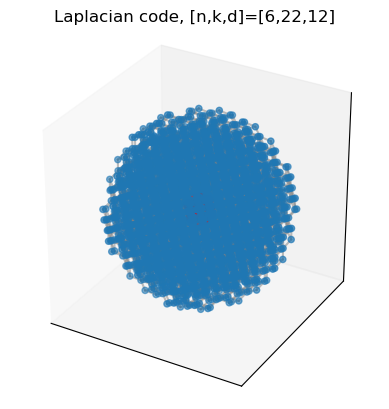

In [4]:
h = cnp.three_dim_self_dual.get_laplacian_code(adjacency_matrix, anti=False)
fig1, ax1, k1, d1 = pipeline_calc_code(proj_pts, adjacency_matrix, h)
if d1:
    ax1.set_title(f'Laplacian code, [n,k,d]=[{n},{k1},{d1}]')
    fig1.savefig(f'lap_low={low}_high={high}.png')

# h = cnp.three_dim_self_dual.get_laplacian_code(adjacency_matrix, anti=True)
# fig2, ax2, k2, d2 = pipeline_calc_code(project_pts, adjacency_matrix, h)
# if d2:
#     ax2.set_title(f'Anti-Laplacian code, [n,k,d]=[{n},{k2},{d2}]')
#     fig2.savefig(f'anti_lap_low={low}_high={high}.png')

# h = cnp.three_dim_self_dual.get_adjacency_code(adjacency_matrix, anti=False)
# fig3, ax3, k3, d3 = calc_code(project_pts, adjacency_matrix, h)
# if d3:
#     ax3.set_title(f'Adjacency code, [n,k,d]=[{n},{k3},{d3}]')
#     ax3.savefig(f'adj_low={low}_high={high}.png')

# h = cnp.three_dim_self_dual.get_adjacency_code(adjacency_matrix, anti=True)
# fig4, ax4, k4, d4 = calc_code(project_pts, adjacency_matrix, h)
# if d4:
#     ax4.set_title(f'Anti-Adjacency code, [n,k,d]=[{n},{k4},{d4}]')
#     ax4.savefig(f'anti_adj_low={low}_high={high}.png')